In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns

import os
print(os.listdir("../input"))

%matplotlib inline

['BlackFriday.csv']


In [2]:
df = pd.read_csv('../input/BlackFriday.csv')
df.sample(5, random_state=1984)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
84928,1001125,P00210342,F,18-25,4,B,2,0,3,4.0,NaN,10880
436038,1001142,P00304542,M,18-25,1,B,1,0,1,5.0,NaN,11674
526202,1003096,P00111742,F,46-50,3,C,1,1,15,NaN,NaN,8388
364315,1002023,P00360842,M,18-25,4,B,2,1,5,NaN,NaN,3651
82179,1000706,P00102442,M,36-45,20,B,2,0,8,NaN,NaN,6127


In [3]:
features = [ 'Gender', 'Age', 'Occupation', 'City_Category',
            'Stay_In_Current_City_Years', 'Marital_Status',
            'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
print("num_features: ", len(features))

num_features:  9


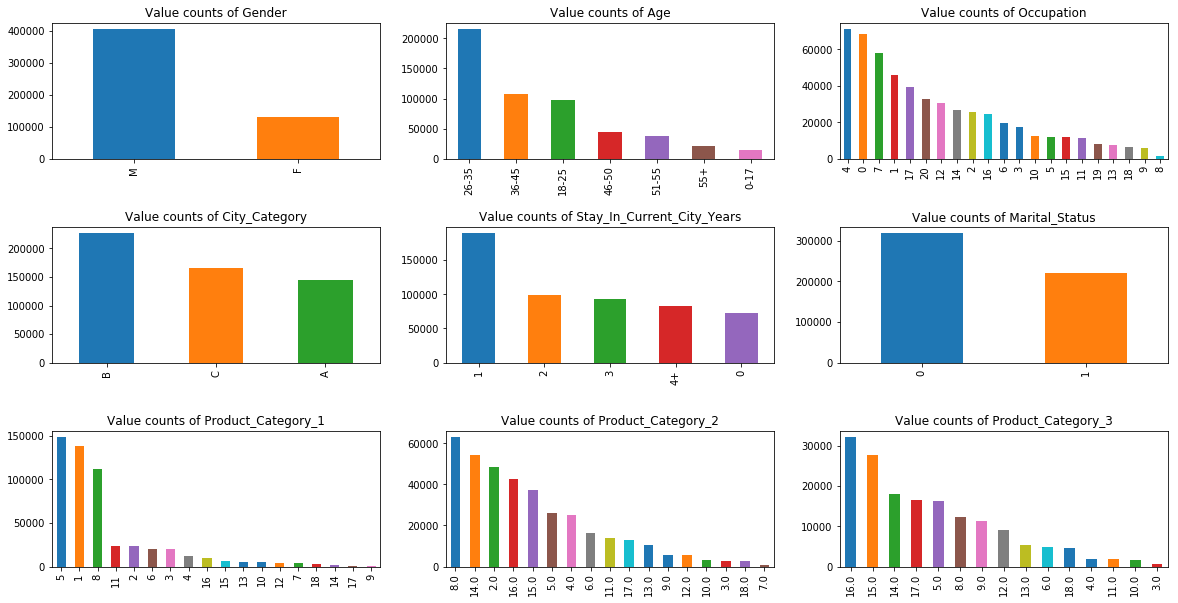

In [4]:
fig, axs_tup = plt.subplots(3, 3, figsize=(20,10),
                            gridspec_kw=dict(hspace=0.5))
for i in range(len(features)):
    df[features[i]].value_counts().plot(kind='bar', title='Value counts of {}'.format(features[i]), ax=axs_tup[int(i/3),i%3])
plt.show()

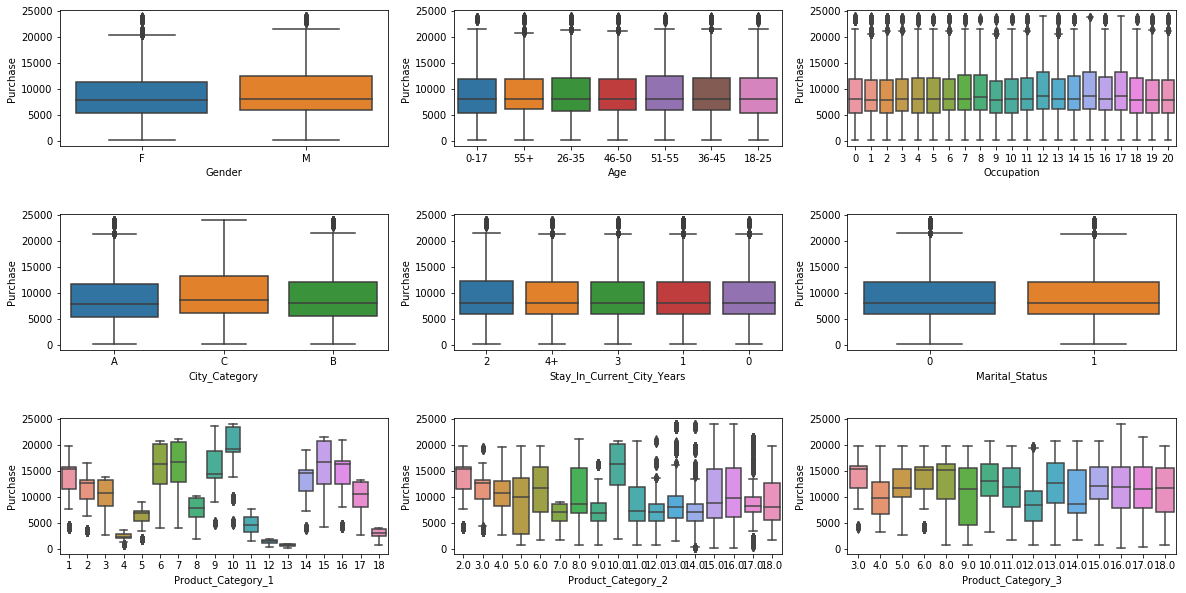

In [5]:
fig, axs_tup = plt.subplots(3, 3, figsize=(20,10),
                            gridspec_kw=dict(hspace=0.5))
for i in range(len(features)):
    sns.boxplot(y="Purchase", x= features[i], data=df , ax=axs_tup[int(i/3),i%3])
plt.show()

In [6]:
# How many null values are there?
df.isnull().sum() / df.isnull().count()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

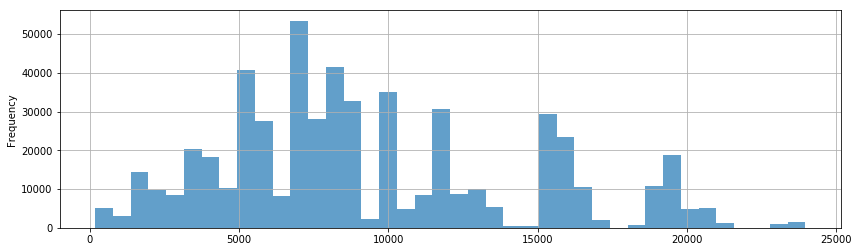

In [7]:
df['Purchase'].plot(kind='hist', bins=40, alpha=0.7, grid=True, figsize=(14,4))
plt.show()

## Feature Extraction

In [8]:
# We would like to use XGBoost, we aknowledge that as of May 2019 it doesn't support categoricals features natively as LighGBM

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [10]:
label_transformer = OrdinalEncoder()
X_all = df[features].copy()
X_all.loc[:,features] = label_transformer.fit_transform(df[features].fillna(-1))
X_all.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.0,10.0,0.0,2.0,0.0,2.0,0.0,0.0
1,0.0,0.0,10.0,0.0,2.0,0.0,0.0,5.0,11.0
2,0.0,0.0,10.0,0.0,2.0,0.0,11.0,0.0,0.0
3,0.0,0.0,10.0,0.0,2.0,0.0,11.0,13.0,0.0
4,1.0,6.0,16.0,2.0,4.0,0.0,7.0,0.0,0.0


In [11]:
y_all = df['Purchase'].copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.05)

## Train a model 

In [13]:
import xgboost as xgb

In [14]:
bst = xgb.XGBRegressor(min_child_weight=100, n_estimators=10000)\
                    .fit(X_train, y_train, verbose=30, eval_set=[(X_test, y_test)], early_stopping_rounds=5)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:9640.13
Will train until validation_0-rmse hasn't improved in 5 rounds.
[30]	validation_0-rmse:3147.43
[60]	validation_0-rmse:3016.53
[90]	validation_0-rmse:2994.14
[120]	validation_0-rmse:2983.48
[150]	validation_0-rmse:2978.92
[180]	validation_0-rmse:2974.84
[210]	validation_0-rmse:2971.73
[240]	validation_0-rmse:2966.04
[270]	validation_0-rmse:2962.92
[300]	validation_0-rmse:2960.73
[330]	validation_0-rmse:2959.03
[360]	validation_0-rmse:2957.56
[390]	validation_0-rmse:2956.11
[420]	validation_0-rmse:2954.32
[450]	validation_0-rmse:2953.01
[480]	validation_0-rmse:2951.76
[510]	validation_0-rmse:2950.79
[540]	validation_0-rmse:2949.79
[570]	validation_0-rmse:2949.16
[600]	validation_0-rmse:2947.95
[630]	validation_0-rmse:2946.98
Stopping. Best iteration:
[640]	validation_0-rmse:2946.77



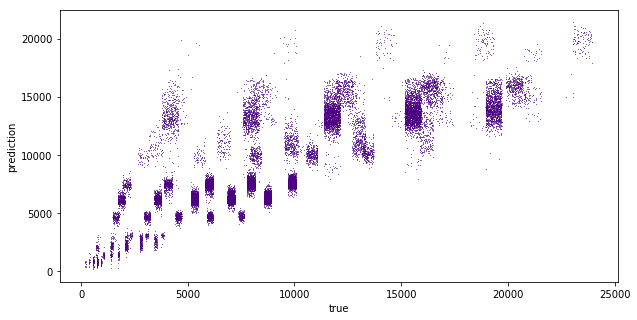

In [15]:
df_prediction = pd.DataFrame()
df_prediction['true'] = y_test
df_prediction['prediction'] = bst.predict(X_test)

df_prediction.plot(x='true', y='prediction', kind='scatter', lw=0, s=0.5, figsize=(10,5), c='indigo')
plt.show()